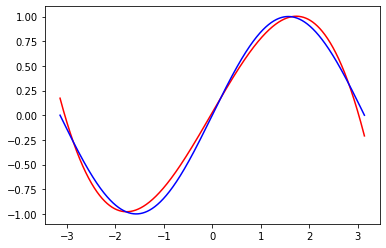

In [4]:
'''
torch.nn class provides a Module class wehre in constructor you can define your model structure, its layers and its parameters. Then in forward function , we can provide input tensor and 
we must have to return output as forward() provides functionality of forward pass.
'''

import torch
import numpy 
import math
import matplotlib.pyplot as plt

class Polynomial(torch.nn.Module):
  def __init__(self):#since our model is simple, y= a+ b*x+c*x**2+d*x**3 and we don't need any layers , so we just define weights in constructor 
    super().__init__()
    self.a = torch.nn.Parameter(torch.randn(()))
    self.b = torch.nn.Parameter(torch.randn(()))
    self.c = torch.nn.Parameter(torch.randn(()))
    self.d = torch.nn.Parameter(torch.randn(()))
  def forward(self, x): #in forward we provide input and calculate output
    return self.a+self.b * x+self.c * x**2 + self.d * x**3


x = torch.linspace(-math.pi, math.pi, 2000)#input
y = torch.sin(x) #original output

model = Polynomial()#create an object of class

optimizer = torch.optim.SGD(model.parameters(),lr = 1e-6) 
criterion = torch.nn.MSELoss(reduction='sum') #loss funciton to use

for i in range(2000):
  y_pred = model(x)# 1st-forward propogation

  loss = criterion(y_pred,y) #2nd-loss computation
  optimizer.zero_grad()
  loss.backward()#3rd back propogation

  optimizer.step() # update weights

plt.figure()
plt.plot(x, y_pred.detach().numpy(), color = 'r')

plt.plot(x, y.detach().numpy(), color = 'b')






